In [25]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [26]:
data=pd.read_csv("/home/placement/Desktop/venkatesh/Advertising.csv")

In [27]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [29]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [30]:
data1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [31]:
cor=data1.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

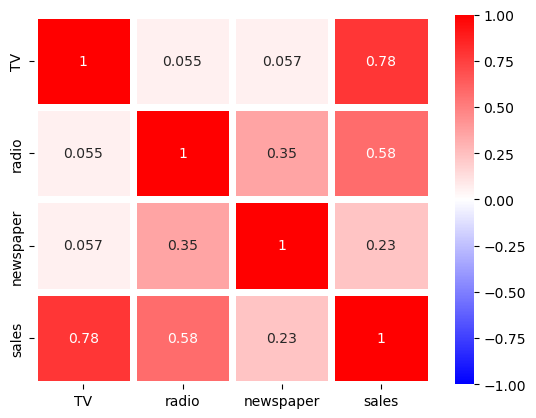

In [32]:
import seaborn as sns
sns.heatmap(cor,vmax=1,vmin=-1,annot=True,linewidths=5,cmap='bwr')

In [33]:
y=data['sales']                
X=data1.drop('sales',axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [36]:
ypred=reg.predict(X_test)
ypred

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8555568430680086

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

3.7279283306815105

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [40]:
elastic_regressor.best_params_

{'alpha': 1}

In [41]:
elastic=ElasticNet(alpha=1)
elastic.fit(X_train,y_train)
y_pred_elastic=elastic.predict(X_test)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.8574667157937812

In [43]:
from sklearn.metrics import mean_squared_error
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

3.678636493022797

In [44]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
...,...,...,...
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [51]:
test=[[110,33,21]]
y_pred_elastict=elastic.predict(test)

In [49]:
y_pred_elastict

array([14.27162918])

In [56]:
test1=[[110,33,21],[220,66,13]]
y_pred_elastict2=elastic.predict(test1)

In [57]:
y_pred_elastict2

array([14.27162918, 25.54573805])